**Name**: Muhammad Haris Azaz Khan 
<br>**CMS ID**: 332445
<br> **BESE-11A**
<hr>

# Without Pruning
<hr>

- Importing every library required for ML

In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection,tree
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
from sklearn.preprocessing import LabelEncoder

## Importing Data

In [ ]:
featureNames=["buying_price","maint_price","no_doors","capacity","luggageboot","safety"]
fd= pd.read_csv("sample_data/car.csv",names=featureNames+["target_names"])
df = pd.DataFrame(fd)
df.sample(10)

,buying_price,maint_price,no_doors,capacity,luggageboot,safety,target_names
1556,low,med,3,4,big,high,vgood
945,med,vhigh,5more,2,small,low,unacc
872,med,vhigh,2,2,big,high,unacc
294,vhigh,med,4,more,big,low,unacc
510,high,vhigh,4,more,big,low,unacc
1395,low,vhigh,5more,more,small,low,unacc
1343,low,vhigh,3,more,small,high,acc
1113,med,med,3,2,big,low,unacc
608,high,high,4,4,med,high,acc
164,vhigh,high,4,2,small,high,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying_price  1728 non-null   object
 1   maint_price   1728 non-null   object
 2   no_doors      1728 non-null   object
 3   capacity      1728 non-null   object
 4   luggageboot   1728 non-null   object
 5   safety        1728 non-null   object
 6   target_names  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Encoding features

In [ ]:
le = LabelEncoder()

In [ ]:
for i in featureNames:
  label=le.fit_transform(df[i])
  df[i]=label
df

,buying_price,maint_price,no_doors,capacity,luggageboot,safety,target_names
0,3,3,0,0,2,1,unacc
1,3,3,0,0,2,2,unacc
2,3,3,0,0,2,0,unacc
3,3,3,0,0,1,1,unacc
4,3,3,0,0,1,2,unacc
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,good
1724,1,1,3,2,1,0,vgood
1725,1,1,3,2,0,1,unacc
1726,1,1,3,2,0,2,good


In [ ]:
label=le.fit_transform(df["target_names"])
df["target"]=label

In [ ]:
#Print the top five samples of acc class
##TO DO
specie = df["target"] == 0
df[specie].head()

,buying_price,maint_price,no_doors,capacity,luggageboot,safety,target_names,target
227,3,2,0,1,2,0,acc,0
230,3,2,0,1,1,0,acc,0
232,3,2,0,1,0,2,acc,0
233,3,2,0,1,0,0,acc,0
239,3,2,0,2,1,0,acc,0


In [ ]:
#Print the top five samples of good class
##TO DO
specie1 = df["target"] == 1
df[specie1].head()

,buying_price,maint_price,no_doors,capacity,luggageboot,safety,target_names,target
1199,2,1,0,1,2,0,good,1
1202,2,1,0,1,1,0,good,1
1204,2,1,0,1,0,2,good,1
1211,2,1,0,2,1,0,good,1
1213,2,1,0,2,0,2,good,1


In [ ]:
#Print the top five samples of unacc
##TO DO
specie2 = df["target"] == 2
df[specie2].head()

,buying_price,maint_price,no_doors,capacity,luggageboot,safety,target_names,target
0,3,3,0,0,2,1,unacc,2
1,3,3,0,0,2,2,unacc,2
2,3,3,0,0,2,0,unacc,2
3,3,3,0,0,1,1,unacc,2
4,3,3,0,0,1,2,unacc,2


In [ ]:
#Print the top five samples of vgood class
##TO DO
specie3 = df["target"] == 3
df[specie3].head()

,buying_price,maint_price,no_doors,capacity,luggageboot,safety,target_names,target
1097,2,2,0,1,0,0,vgood,3
1106,2,2,0,2,0,0,vgood,3
1124,2,2,1,1,0,0,vgood,3
1130,2,2,1,2,1,0,vgood,3
1133,2,2,1,2,0,0,vgood,3


**target -> target_name** 
- 0->acc
- 1->good
- 2->unacc
- 3->vgood

In [ ]:
print(df.value_counts("target"))

target
2    1210
0     384
1      69
3      65
dtype: int64


In [ ]:
X = df[featureNames]
y = df[['target']]

## Training and Testing data

In [ ]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=70)

In [ ]:
cls = tree.DecisionTreeClassifier(criterion='entropy')
#Fit the model using the fit method. 
cls.fit(X=X_train,y=y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5163690476190477, 0.9666666666666667, 'X[3] <= 0.5\nentropy = 1.232\nsamples = 1382\nvalue = [312, 61, 956, 53]'),
 Text(0.5004960317460317, 0.9, 'entropy = 0.0\nsamples = 465\nvalue = [0, 0, 465, 0]'),
 Text(0.5322420634920635, 0.9, 'X[5] <= 0.5\nentropy = 1.51\nsamples = 917\nvalue = [312, 61, 491, 53]'),
 Text(0.2569444444444444, 0.8333333333333334, 'X[0] <= 2.5\nentropy = 1.684\nsamples = 314\nvalue = [171, 28, 62, 53]'),
 Text(0.13293650793650794, 0.7666666666666667, 'X[0] <= 0.5\nentropy = 1.645\nsamples = 236\nvalue = [132, 28, 23, 53]'),
 Text(0.07142857142857142, 0.7, 'X[1] <= 2.5\nentropy = 0.781\nsamples = 69\nvalue = [53, 0, 16, 0]'),
 Text(0.05555555555555555, 0.6333333333333333, 'entropy = 0.0\nsamples = 53\nvalue = [53, 0, 0, 0]'),
 Text(0.0873015873015873, 0.6333333333333333, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0]'),
 Text(0.19444444444444445, 0.7, 'X[4] <= 1.5\nentropy = 1.66\nsamples = 167\nvalue = [79, 28, 7, 53]'),
 Text(0.11904761904761904, 0.6

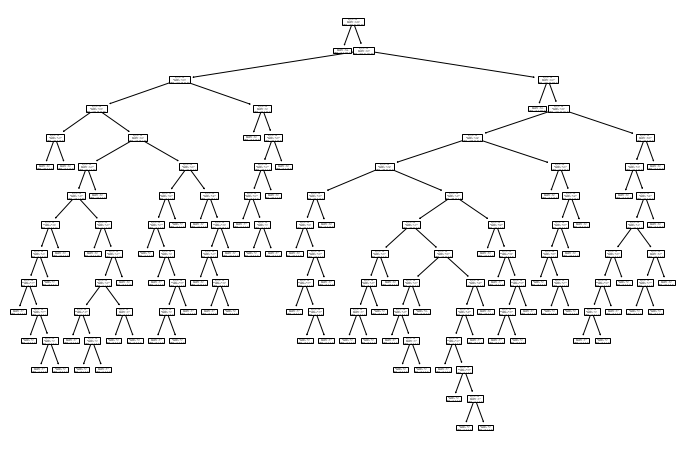

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(cls) 

In [ ]:
dot_data = tree.export_graphviz(cls, out_file=None, 
                      feature_names=featureNames,  
                      class_names=["acc","good","unacc","vgood"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("car_decision_tree_withoutpruning") 

'car_decision_tree_withoutpruning.pdf'

## Accuracy of train and test data

In [ ]:
cls.score(X_train,y_train)*100

100.0

In [ ]:
cls.score(X_test,y_test)*100

96.82080924855492

## Depth of the Tree

In [ ]:
cls.tree_.max_depth

14

## Number of nodes of the tree

In [ ]:
cls.tree_.node_count

151

## Tree Diagram
![Without pruned tree](https://raw.githubusercontent.com/haris-khan1596/ML_lab1/main/car_decision_tree_withoutpruning-1.png)


# Pre-Pruning
<hr>

In [ ]:
params={
    'max_depth': [12],
    'min_samples_leaf': [1]
}
grid_search = model_selection.GridSearchCV(cls, params, cv=5)

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 12, 'min_samples_leaf': 1}
Best score: 0.9703343274211269


## Accuracy of the pre_pruned Tree

In [ ]:
grid_search.score(X_test,y_test)*100

96.82080924855492

In [ ]:
grid_search.score(X_train,y_train)*100

99.92764109985528

[Text(0.5163690476190477, 0.9615384615384616, 'X[3] <= 0.5\nentropy = 1.232\nsamples = 1382\nvalue = [312, 61, 956, 53]'),
 Text(0.5004960317460317, 0.8846153846153846, 'entropy = 0.0\nsamples = 465\nvalue = [0, 0, 465, 0]'),
 Text(0.5322420634920635, 0.8846153846153846, 'X[5] <= 0.5\nentropy = 1.51\nsamples = 917\nvalue = [312, 61, 491, 53]'),
 Text(0.2569444444444444, 0.8076923076923077, 'X[0] <= 2.5\nentropy = 1.684\nsamples = 314\nvalue = [171, 28, 62, 53]'),
 Text(0.13293650793650794, 0.7307692307692307, 'X[0] <= 0.5\nentropy = 1.645\nsamples = 236\nvalue = [132, 28, 23, 53]'),
 Text(0.07142857142857142, 0.6538461538461539, 'X[1] <= 2.5\nentropy = 0.781\nsamples = 69\nvalue = [53, 0, 16, 0]'),
 Text(0.05555555555555555, 0.5769230769230769, 'entropy = 0.0\nsamples = 53\nvalue = [53, 0, 0, 0]'),
 Text(0.0873015873015873, 0.5769230769230769, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0]'),
 Text(0.19444444444444445, 0.6538461538461539, 'X[4] <= 1.5\nentropy = 1.66\nsamples = 16

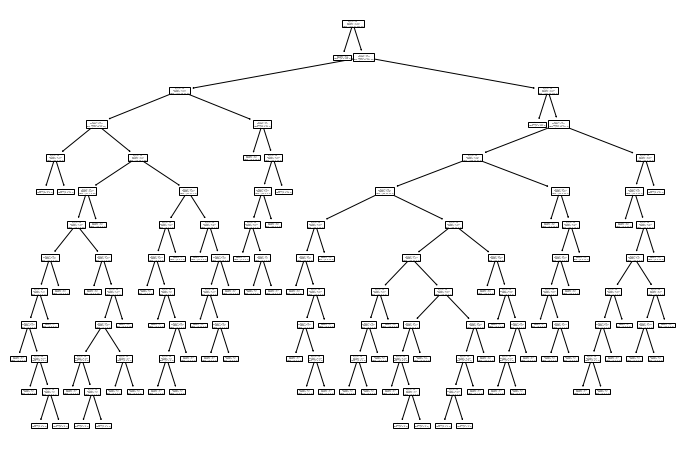

In [ ]:
preTree=tree.DecisionTreeClassifier(criterion="entropy",max_depth=12,min_samples_leaf=1)
#Fit the model using the fit method. 
preTree.fit(X=X_train,y=y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(preTree) 

In [ ]:
dot_data = tree.export_graphviz(preTree, out_file=None, 
                      feature_names=featureNames,  
                      class_names=["acc","good","unacc","vgood"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("car_decision_tree_pre_pruning") 
print("pre pruning max depth",preTree.tree_.max_depth,"\npre prunning nodes",preTree.tree_.node_count)

pre pruning max depth 12 
pre prunning nodes 147


## Tree Diagram
![Decision tree Pre-Pruning](https://raw.githubusercontent.com/haris-khan1596/ML_lab1/main/car_decision_tree_pre_pruning-1.png)

# Post Pruning
<hr>

In [ ]:
postTree = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.01)
# Train the model on the training data
postTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy')

## Accuracy of post_pruned Tree

In [ ]:
# Evaluate the model on the testing data
postTree.score(X_test, y_test)

0.9104046242774566

In [ ]:
# Evaluate the model on the testing data
postTree.score(X_train, y_train)

0.9479015918958031

## Depth of post_pruned tree

In [ ]:
postTree.tree_.max_depth

8

## Number of nodes of the post_pruned tree

In [ ]:
postTree.tree_.node_count

51

In [ ]:
dot_data = tree.export_graphviz(postTree, out_file=None, 
                      feature_names=featureNames,  
                      class_names=["acc","good","unacc","vgood"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("car_decision_tree_post_pruning") 
print("pre pruning max depth",postTree.tree_.max_depth,"\npre prunning nodes",postTree.tree_.node_count)

pre pruning max depth 8 
pre prunning nodes 51


## Tree Diagram
![Decision Tree Post-Pruning](https://raw.githubusercontent.com/haris-khan1596/ML_lab1/main/car_decision_tree_post_pruning-1.png)